# Comparison between the genders (after controlling for type and age)

Questions

- What are the differences between the genders?

Gender effect - General Questions

- What are the differences between the 2 genders?
- Are they different for the 3 ages?
- Are they different for the two types?

# Loads

## Libraries and functions

In [44]:
source("load_libraries.R")

Allowing multi-threading with up to 4 threads.
[1] "preparing gene to GO mapping data..."
[1] "preparing IC data..."
[1] "preparing gene to GO mapping data..."
[1] "preparing IC data..."
[1] "preparing gene to GO mapping data..."
[1] "preparing IC data..."


In [45]:
source("functions.R")

## Data

In [46]:
load("../results/dge/gene_length.RData")
load("../results/dge/metadata.RData")
load("../results/dge/norm_counts.RData")
load("../results/dge/dge.RData")

In [47]:
load("../results/dge/dge_net.RData")
load("../results/dge/dge_layout.RData")
load("../results/dge/dge_net_connected_gene_colors.RData")
load("../results/dge/dge_net_pal2.RData")

In [48]:
module_nb = length(unique(connected_gene_colors))
pal2 = c(pal2, "white", "black")

In [49]:
# Comparison between the ages (after controlling for type and gender)
M_F = results(dge,contrast= c(0,1,0,0,0,1/3,1/3,1/2,0,0), alpha=0.05, test="Wald")

In [50]:
samples = c(
    'SPF_8w_F_1_2','SPF_8w_F_3_2','SPF_8w_F_4_2','SPF_8w_F_5_2','SPF_52w_F_1_2','SPF_52w_F_2_2','SPF_52w_F_3_2','SPF_52w_F_4_2','SPF_52w_F_5_2','SPF_52w_F_6_2','SPF_104w_F_1_2','SPF_104w_F_2_2','SPF_104w_F_3_2',
    'GF_8w_F_1_2','GF_8w_F_2_2','GF_8w_F_3_2','GF_8w_F_4_2','GF_8w_F_5_2','GF_52w_F_1_2','GF_52w_F_2_2','GF_52w_F_3_2','GF_52w_F_4_2','GF_52w_F_5_2','GF_52w_F_6_2','GF_104w_F_1_2','GF_104w_F_2_2','GF_104w_F_3_2',
    'SPF_8w_M_1_2','SPF_8w_M_2_2','SPF_8w_M_3_2','SPF_8w_M_4_2','SPF_52w_M_1_2','SPF_52w_M_2_2','SPF_52w_M_3_2','SPF_52w_M_4_2','SPF_52w_M_5_2','SPF_104w_M_1_2','SPF_104w_M_2_2','SPF_104w_M_3_2','SPF_104w_M_4_2','SPF_104w_M_5_2','SPF_104w_M_6_2','SPF_104w_M_7_2','SPF_104w_M_8_2','SPF_104w_M_9_2','SPF_104w_M_10_2','SPF_104w_M_11_2','SPF_104w_M_12_2','SPF_104w_M_13_2','SPF_104w_M_14_2',
    'GF_8w_M_1_2','GF_8w_M_2_2','GF_8w_M_3_2','GF_8w_M_4_2','GF_52w_M_1_2','GF_52w_M_2_2','GF_52w_M_3_2','GF_52w_M_4_2','GF_104w_M_1_2','GF_104w_M_2_2')
annot = as.data.frame(colData(dge)[, c("gender", "type", "age")])
to_comp = c("M VS F")

# Differentially expressed genes

In [51]:
gender_data = list(M_F)
names(gender_data) = to_comp
gender_deg = extract_diff_expr_genes(gender_data, "gender-effect/gender/")

Warning message in pcls(G):
“initial point very close to some inequality constraints”Warning message in stack.default(getgo(rownames(l$sign_fc_deg), "mm10", "geneSymbol")):
“non-vector elements will be ignored”Warning message in stack.default(getgo(rownames(as.data.frame(l$deg)), "mm10", "geneSymbol", :
“non-vector elements will be ignored”

# Stats

,All DEG (Wald padj < 0.05),All over-expressed genes (Wald padj < 0.05 & FC > 0),All under-expressed genes (Wald padj < 0.05 & FC < 0),DEG (Wald padj < 0.05 & abs(FC) > 1.5),Over-expressed genes (Wald padj < 0.05 & FC > 1.5),Under-expressed genes (Wald padj < 0.05 & FC < 1.5)
M VS F,4242,2193,2049,1000,848,152


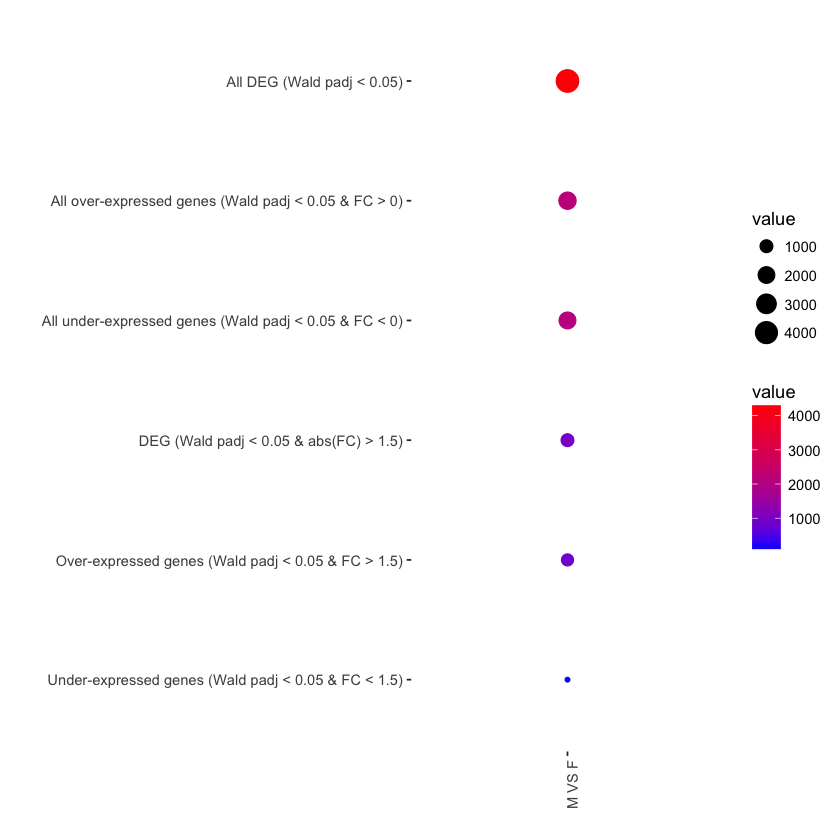

In [52]:
gender_deg$stat
plot_stat_mat(gender_deg$stat)

# Log2FC for DEG (Wald padj < 0.05 & abs(FC) > 1.5)

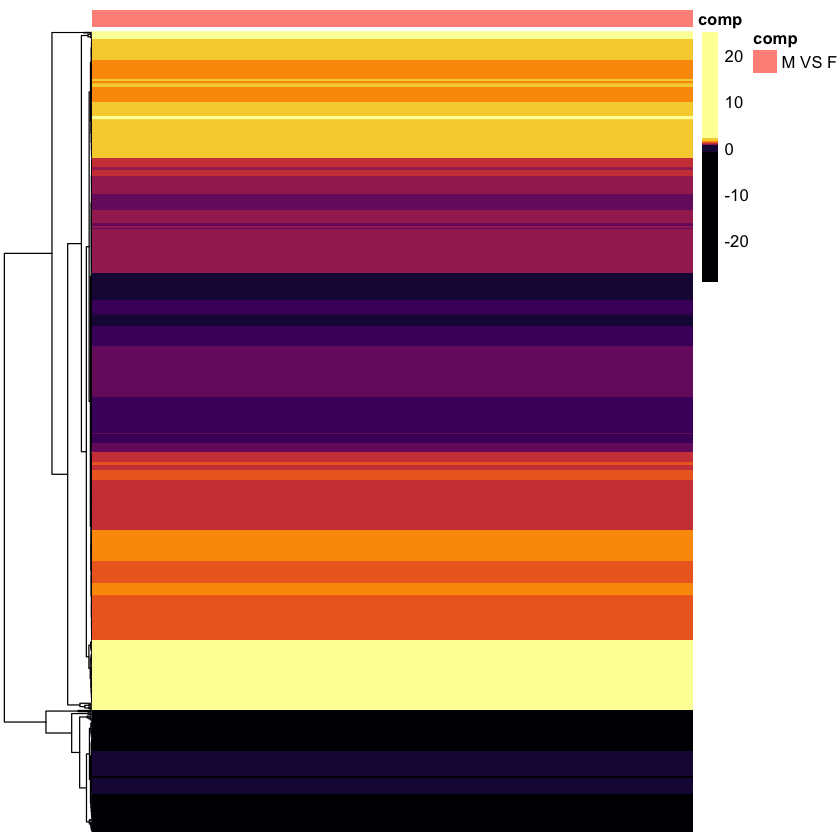

In [53]:
fc_annot = data.frame(comp = c("M VS F"))
rownames(fc_annot) = colnames(gender_deg$sign_fc_deg)
plot_fc_heatmap(gender_deg$sign_fc_deg, fc_annot)

# DEG into gene co-expression network

- White: up-regulated 
- Black: down-regulated

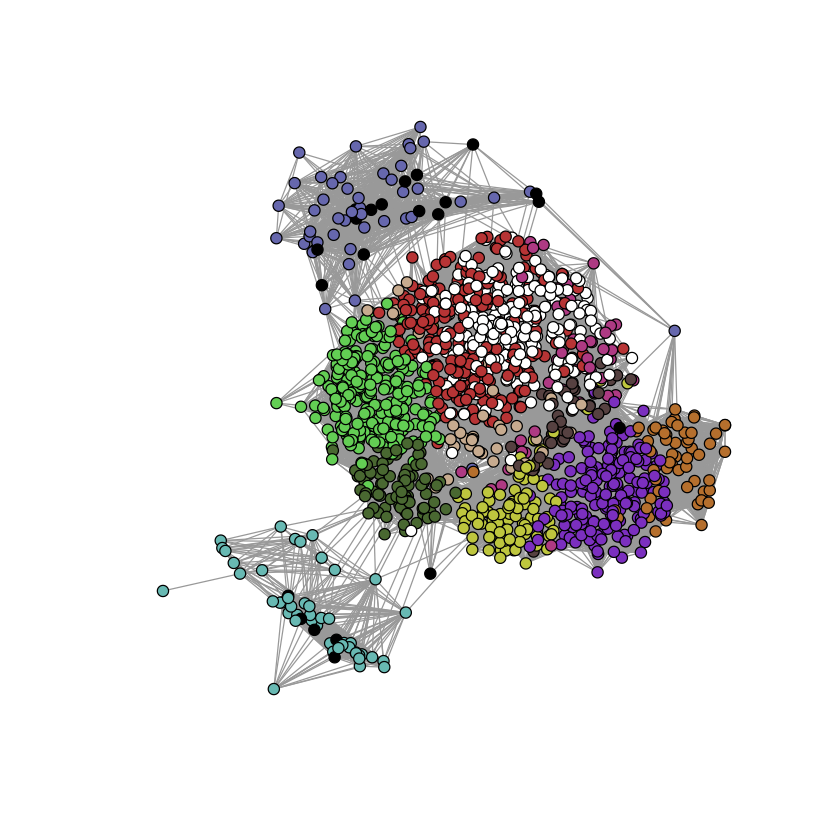

In [54]:
col_GF_vs_SPF = get_deg_colors(gender_deg, to_comp[1], connected_gene_colors, module_nb) 
plot_net_with_layout(net, col_GF_vs_SPF, pal2, layout, add_legend = F)

# GO analysis

In [55]:
full_go_desc = gender_deg$GO_wall[[1]][,"term"]
names(full_go_desc) = gender_deg$GO_wall[[1]][,"category"]

## Biological process

Dot-plot with the most over-represented GO (20 most significant p-values for the different comparison)

Using term, id as id variables
Using term, id as id variables


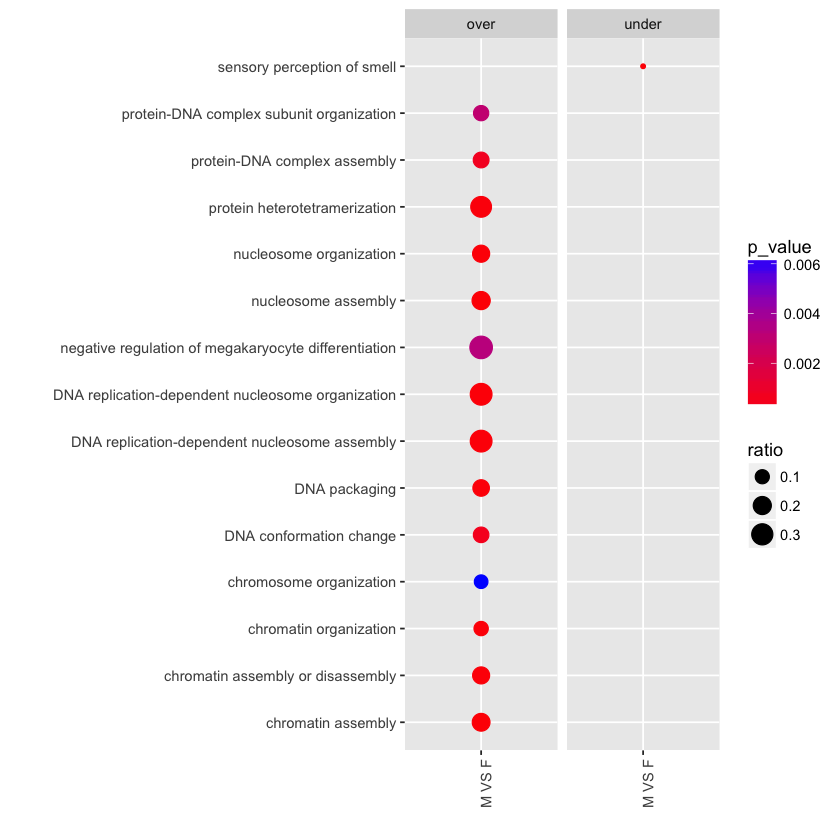

In [56]:
plot_top_go(gender_deg$over_represented_GO,
            gender_deg$under_represented_GO,
            gender_deg$GO_wall,
            "BP",
            20)

In [58]:
col = get_GO_network_col(BP_network, to_comp[1])
dotRes = getAmigoTree(goIDs=names(col),
                      color=col,
                      filename="../results/dge/gender-effect/gender/go/M_VS_F",
                      picType="png",
                      saveResult=TRUE)

![](../results/dge/gender-effect/gender/go/M_VS_F.png)

GO Tree at "../results/dge/gender-effect/gender/go/M_VS_F.png"

## Cellular components

Dot-plot with the most over-represented GO (20 most significant p-values for the different comparison)

Using term, id as id variables
Using term, id as id variables


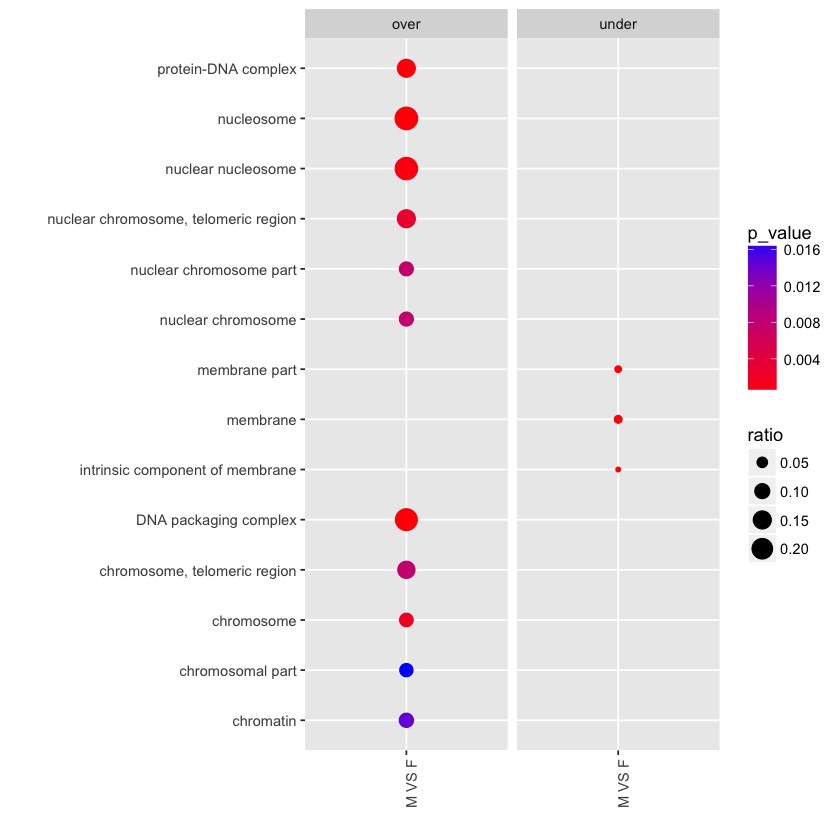

In [59]:
plot_top_go(gender_deg$over_represented_GO,
            gender_deg$under_represented_GO,
            gender_deg$GO_wall,
            "CC",
            20)

## Molecular functions

Dot-plot with the most over-represented GO (20 most significant p-values for the different comparison)

Using term, id as id variables


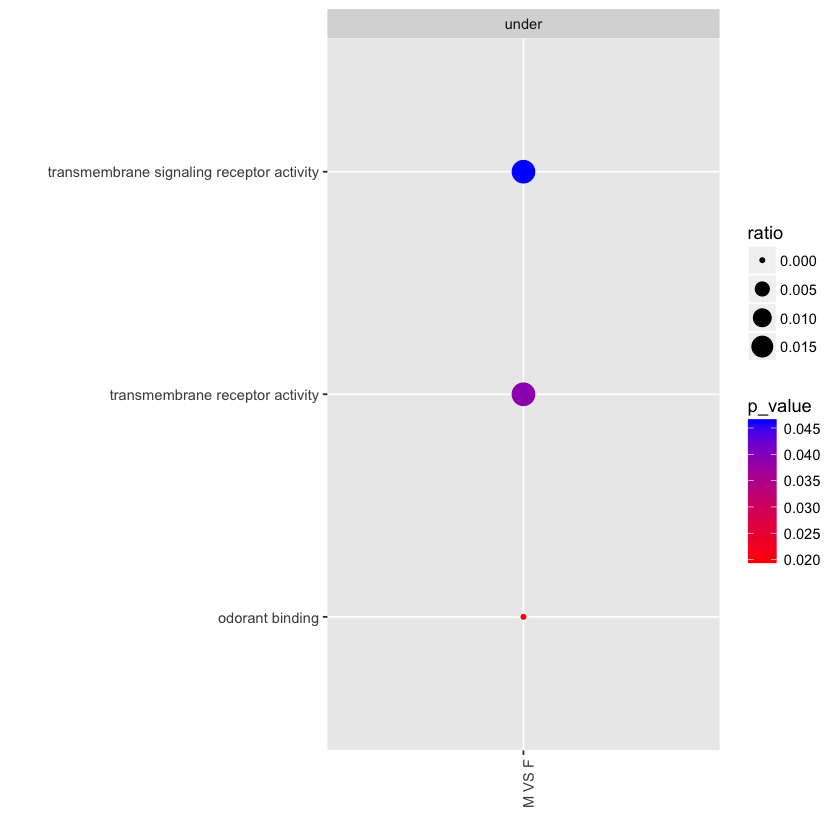

In [60]:
plot_top_go(gender_deg$over_represented_GO,
            gender_deg$under_represented_GO,
            gender_deg$GO_wall,
            "MF",
            20)

# KEGG pathways

In [61]:
plot_kegg_pathways(gender_deg$over_represented_KEGG[,"category"],
                   gender_deg$fc_deg,
                   "../results/dge/gender-effect/gender/kegg/over_repr_kegg/")

ERROR: Error in `$<-.data.frame`(`*tmp*`, labels, value = c("", "", "", "", "", : replacement has 34 rows, data has 48


In [ ]:
plot_kegg_pathways(gender_deg$under_represented_KEGG[,"category"],
                   gender_deg$fc_deg,
                   "../results/dge/gender-effect/gender/kegg/under_repr_kegg/")